In [14]:
import seaborn as sb
import pandas as pd
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [15]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


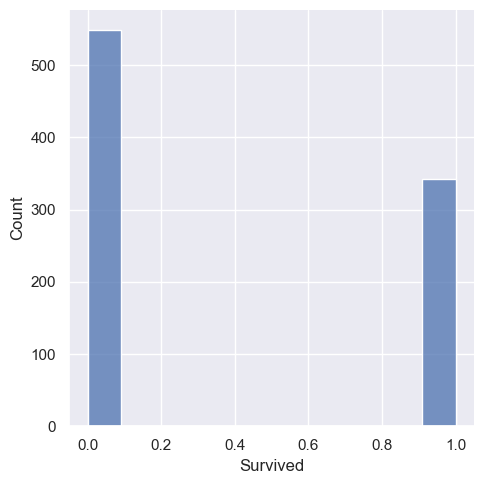

In [16]:
sb.set_theme()
sb.displot(data=df, x='Survived', kind='hist').set_titles('Survival count')

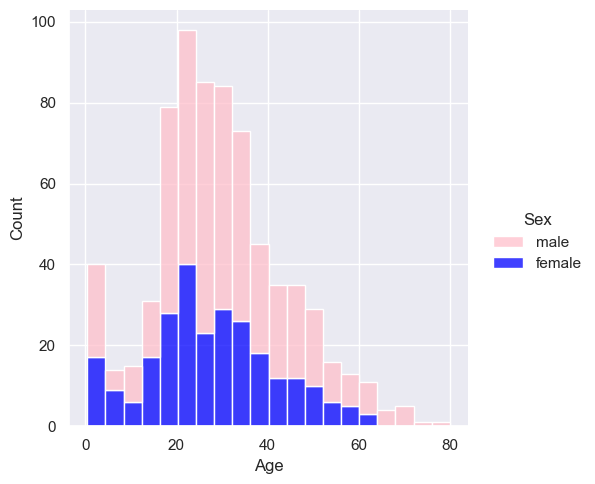

In [17]:
#See if all passengers are either male or female
all(x == 'male' or x == 'female' for x in df['Sex'])

#Show distribution of Survival count by age
sb.displot(data=df, x='Age', hue='Sex', palette=['pink', 'blue'], multiple='stack')

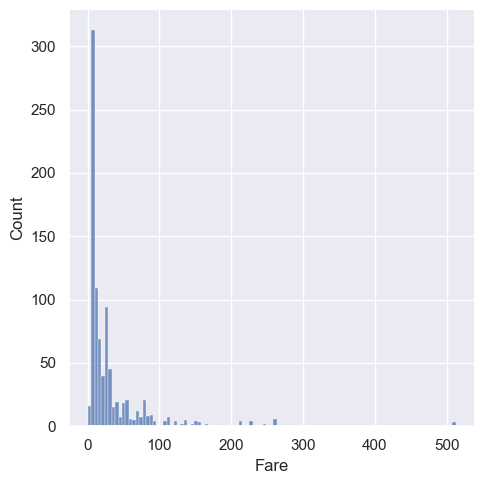

In [18]:
sb.displot(data=df, x='Fare', multiple='stack').set_titles('Survival count by Fare')

Text(0.5, 1.0, 'Third class')

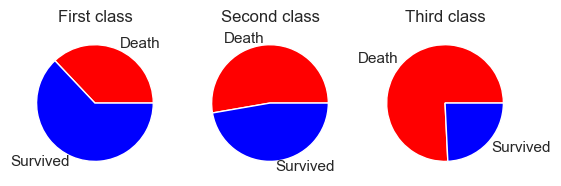

In [23]:
first_class = df.loc[df['Pclass'] == 1]
second_class = df.loc[df['Pclass'] == 2]
third_class = df.loc[df['Pclass'] == 3]

first_class_survival_stats = [first_class.loc[first_class['Survived'] == x].shape[0] for x in range(2)]
second_class_survival_stats = [second_class.loc[second_class['Survived'] == x].shape[0] for x in range(2)]
third_class_survival_stats = [third_class.loc[third_class['Survived'] == x].shape[0] for x in range(2)]
_label = ['Death', 'Survived']

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.pie(first_class_survival_stats, colors=['red', 'blue'], labels=_label)
ax1.set_title('First class')
ax2.pie(second_class_survival_stats, colors=['red', 'blue'], labels=_label)
ax2.set_title('Second class')
ax3.pie(third_class_survival_stats, colors=['red', 'blue'], labels=_label)
ax3.set_title('Third class')
